# Principal Component Analysis


## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset


In [2]:
dataset = pd.read_csv("../../datasets/13_wine.csv")
X = dataset.iloc[:, :-1].values  # matrix of features(independent variables)
y = dataset.iloc[:, -1].values  # dependent variable vector

## Splitting the Dataset into Training set and Test set


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Applying PCA


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Training the Logistic Regression model on the Training set


In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

## Visualizing the Training Set Results


C:\Users\cmsha\AppData\Local\Temp\ipykernel_16516\2998719235.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


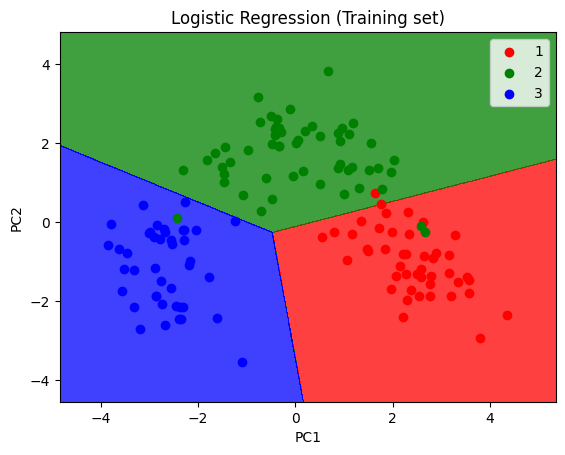

In [13]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green", "blue")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green", "blue"))(i),
        label=j,
    )
plt.title("Logistic Regression (Training set)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

## Visualizing the Test Set Results


C:\Users\cmsha\AppData\Local\Temp\ipykernel_16516\2013102837.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


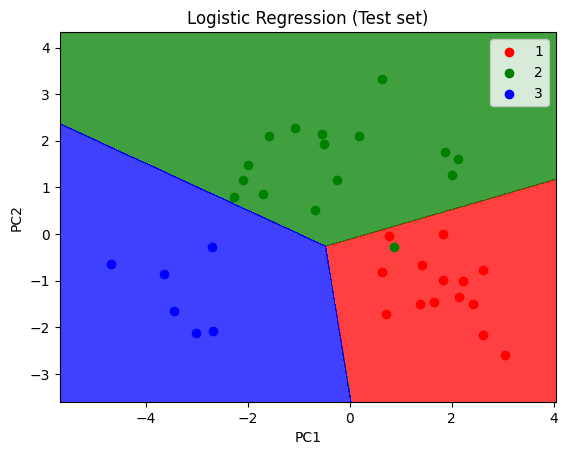

In [14]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green", "blue")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green", "blue"))(i),
        label=j,
    )
plt.title("Logistic Regression (Test set)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()